### Background
We are an e-commerce clothing brand that wishes to break into a new market. We’ve collected data from a sample of potential customers from that market. To maximize our chance of success, we will create 3 different customer segments and produce tailored marketing campaigns for each of them.

To create our customer segments, we’d like to create clusters based on demographics attributes and affinity scores toward specific interests.

We’ve also collected behavioral data on spending patterns. We wish to only target potential customers who are willing to spend on clothing and more willing to spend money online.


### Objective
First, keep in mind that our target audience will only include people who score greater than 5.0 on both “Clothing Spending” AND “Internet Spending”.

We are worried that we’ll run into dataset size problems if we create our clusters on all of the demographics and interest features. Please perform Principal Component Analysis to see if we can capture at least 80% of the variance in our dataset with fewer input features for our clustering model.

Train a clustering model that outputs 3 clusters based on demographic and interest features for our target audience.

Now we need to package our work together so that we can apply our clusters to future marketing campaigns. Write a function with the following specifications:

Four inputs:
* A raw dataset with the same structure as “millennial_market_research.csv”
* A trained PCA transformer
* A trained clustering model
* The number of principal components to keep
<br><br>
Outputs a table with 5 columns:
* Age
* Gender
* Clothing Spending
* Internet Spending
* Cluster (from the model)


** My Personal goal is to get some hands on experince on PCA and see how we can use it using python.

In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

In [163]:
data=pd.read_csv("millenial_market_research.csv")

In [164]:
data.head()

,Age,Gender,Music,Movies/Theaters,Tech/Gadgets,Museums,Food/Dining,Camping/Hiking,Concerts,Clubs/Dancing,...,Art,Shopping,Social Media,Reading,Socializing,Gaming,Entertainment Spending,Clothing Spending,Internet Spending,Retail Spending
0,17.0,male,7.3,8.1,2.8,1.6,4.5,7.1,0.3,0.6,...,2.9,9.9,4.4,1.4,8.7,6.7,9.7,8.6,9.5,8.2
1,21.0,female,9.4,9.3,2.2,2.2,3.2,9.5,5.4,1.3,...,0.6,3.0,5.7,4.5,5.3,9.5,5.3,3.5,4.2,10.0
2,19.0,female,6.8,7.5,6.4,2.1,7.8,4.4,1.9,5.8,...,4.7,4.4,2.7,8.5,10.0,3.5,3.5,5.2,0.1,3.1
3,26.0,female,4.5,6.8,1.3,8.5,8.0,7.4,1.5,6.2,...,1.1,1.8,5.5,9.8,5.1,7.0,3.5,2.3,0.3,7.2
4,19.0,female,9.1,9.8,1.4,3.9,3.1,5.4,8.2,4.7,...,4.5,4.4,5.1,5.0,6.8,3.0,2.0,5.9,5.6,8.2


In [165]:
#Let's check the number of rows and columns
data.shape

(10000, 23)

In [166]:
#Let's check if we have any null/missing values
data.isnull().sum()

Age                       0
Gender                    0
Music                     0
Movies/Theaters           0
Tech/Gadgets              0
Museums                   0
Food/Dining               0
Camping/Hiking            0
Concerts                  0
Clubs/Dancing             0
Writing                   0
Sports                    0
Gardening                 0
Art                       0
Shopping                  0
Social Media              0
Reading                   0
Socializing               0
Gaming                    0
Entertainment Spending    0
Clothing Spending         0
Internet Spending         0
Retail Spending           0
dtype: int64

In [167]:
# Categorical feature summary statistics
data.describe(include=['object'])

,Gender
count,10000
unique,2
top,female
freq,5877


In [168]:
data.describe()

,Age,Music,Movies/Theaters,Tech/Gadgets,Museums,Food/Dining,Camping/Hiking,Concerts,Clubs/Dancing,Writing,...,Art,Shopping,Social Media,Reading,Socializing,Gaming,Entertainment Spending,Clothing Spending,Internet Spending,Retail Spending
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,20.386600,8.485650,8.221250,4.334410,4.226790,3.51436,6.339660,3.859940,3.683200,2.783220,...,3.694960,5.537580,5.471920,5.067150,8.144480,5.663800,5.422330,5.240530,4.785600,6.113950
std,2.780596,1.401132,1.488302,2.922271,2.702377,2.68117,2.471258,2.946626,3.085511,2.641601,...,2.597541,2.626148,2.617237,2.725082,1.537818,3.150193,2.438987,2.460029,2.631747,2.254891
min,15.000000,0.000000,0.100000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,8.200000,7.600000,1.700000,1.900000,1.20000,4.700000,1.300000,1.100000,0.875000,...,1.500000,3.500000,3.500000,2.900000,7.400000,2.700000,3.700000,3.400000,2.700000,4.600000
50%,20.000000,8.800000,8.600000,4.000000,4.000000,2.90000,6.700000,3.200000,2.500000,1.700000,...,3.300000,5.600000,5.500000,5.000000,8.600000,6.100000,5.400000,5.300000,4.700000,6.300000
75%,21.000000,9.400000,9.300000,6.700000,6.125000,5.40000,8.300000,6.000000,6.100000,4.200000,...,5.600000,7.700000,7.600000,7.300000,9.300000,8.600000,7.300000,7.100000,6.800000,7.800000
max,30.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [169]:
#We will only include people who score greater than 5.0 on both “Clothing Spending” AND “Internet Spending”.
data_subset = data[(data['Clothing Spending'] > 5) & (data['Internet Spending'] > 5)]
data_subset.shape

(2889, 23)

In [170]:
data_subset.describe()

,Age,Music,Movies/Theaters,Tech/Gadgets,Museums,Food/Dining,Camping/Hiking,Concerts,Clubs/Dancing,Writing,...,Art,Shopping,Social Media,Reading,Socializing,Gaming,Entertainment Spending,Clothing Spending,Internet Spending,Retail Spending
count,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,...,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000
mean,20.317757,8.546106,8.389477,5.169401,4.328799,3.338733,6.225718,4.246798,3.552406,2.826480,...,4.392073,6.439633,6.055002,5.138006,8.432710,6.056040,6.621876,7.364694,7.407580,6.856767
std,2.780416,1.429986,1.418150,2.956390,2.623852,2.669448,2.532808,3.033568,2.989970,2.637098,...,2.665525,2.397534,2.513393,2.652095,1.357178,3.040195,2.062924,1.394883,1.448847,2.086428
min,15.000000,0.200000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,5.100000,5.100000,0.000000
25%,19.000000,8.300000,8.100000,2.600000,2.200000,1.100000,4.400000,1.500000,1.100000,0.900000,...,2.000000,4.800000,4.300000,3.100000,8.100000,3.700000,5.200000,6.200000,6.100000,5.400000
50%,20.000000,8.800000,8.700000,5.200000,4.200000,2.600000,6.700000,3.800000,2.400000,1.700000,...,4.400000,6.700000,6.300000,5.200000,8.800000,6.900000,6.800000,7.300000,7.400000,7.100000
75%,22.000000,9.400000,9.400000,8.000000,5.900000,5.200000,8.300000,6.700000,5.900000,4.200000,...,6.500000,8.400000,8.200000,7.200000,9.400000,8.700000,8.300000,8.500000,8.700000,8.600000
max,30.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


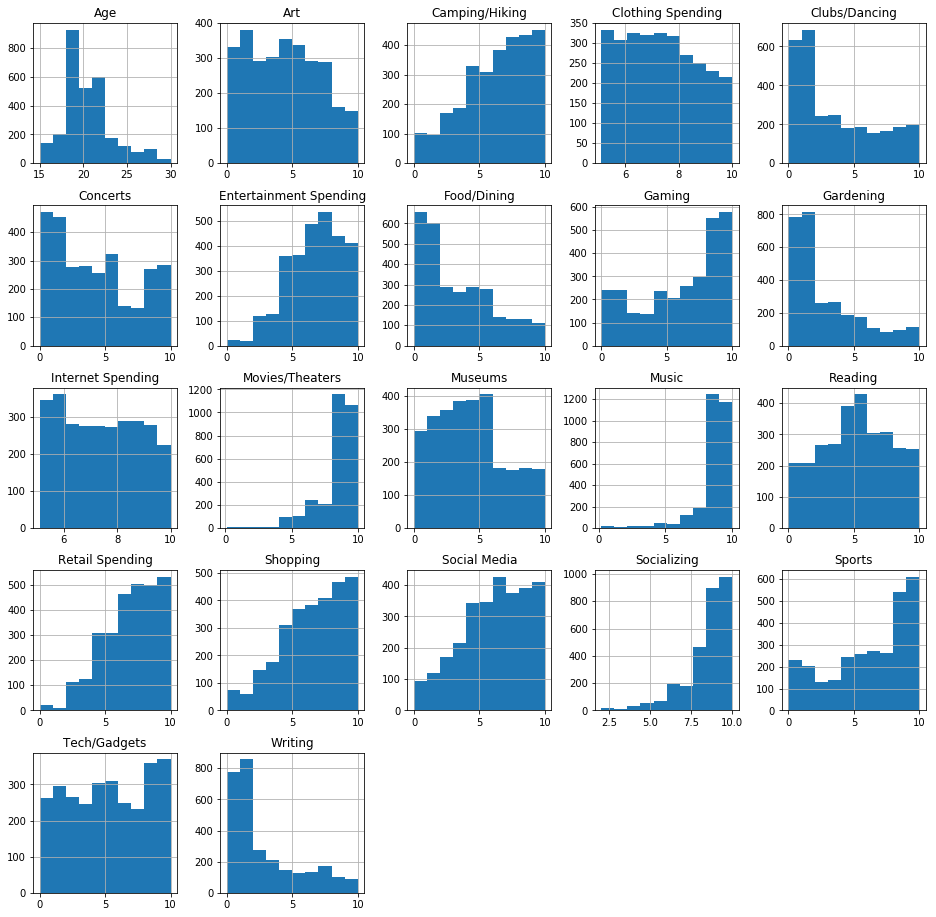

In [171]:
data_subset.hist(figsize=(16,16))
plt.show()

### General Insights
* All of the feature distributions look reasonable/ordinary.
* No missing values present
* Only Gender is a categorical feature.
* I also do not see any outliers.
* Also almost all the features are sclaed between 0 to 10 except age and gender. <b>Generally feature scaling is an important proprecessing step for PCA. I am not doing it in this case. I actually did tried it and didn't found any major difference.</b>[In real world, this won't be the case though].

In [190]:
#Lets convert the Gender category feature to numerical feature which has only two values. 1 if female and 0 if male. 
f = lambda x: 0 if x =='male' else 1
data_subset['Gender'] = data_subset['Gender'].map(f)

In [173]:
data_subset.describe()

,Age,Gender,Music,Movies/Theaters,Tech/Gadgets,Museums,Food/Dining,Camping/Hiking,Concerts,Clubs/Dancing,...,Art,Shopping,Social Media,Reading,Socializing,Gaming,Entertainment Spending,Clothing Spending,Internet Spending,Retail Spending
count,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,...,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000
mean,20.317757,0.532710,8.546106,8.389477,5.169401,4.328799,3.338733,6.225718,4.246798,3.552406,...,4.392073,6.439633,6.055002,5.138006,8.432710,6.056040,6.621876,7.364694,7.407580,6.856767
std,2.780416,0.499015,1.429986,1.418150,2.956390,2.623852,2.669448,2.532808,3.033568,2.989970,...,2.665525,2.397534,2.513393,2.652095,1.357178,3.040195,2.062924,1.394883,1.448847,2.086428
min,15.000000,0.000000,0.200000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,5.100000,5.100000,0.000000
25%,19.000000,0.000000,8.300000,8.100000,2.600000,2.200000,1.100000,4.400000,1.500000,1.100000,...,2.000000,4.800000,4.300000,3.100000,8.100000,3.700000,5.200000,6.200000,6.100000,5.400000
50%,20.000000,1.000000,8.800000,8.700000,5.200000,4.200000,2.600000,6.700000,3.800000,2.400000,...,4.400000,6.700000,6.300000,5.200000,8.800000,6.900000,6.800000,7.300000,7.400000,7.100000
75%,22.000000,1.000000,9.400000,9.400000,8.000000,5.900000,5.200000,8.300000,6.700000,5.900000,...,6.500000,8.400000,8.200000,7.200000,9.400000,8.700000,8.300000,8.500000,8.700000,8.600000
max,30.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [174]:
#We only like to create clusters based on demographics attributes and affinity scores toward specific interests.
#So lets remove the behavioral features 
data_subset = data_subset.drop(['Entertainment Spending','Clothing Spending','Internet Spending','Retail Spending'], axis=1)

In [175]:
data_subset.shape

(2889, 19)

Now we have the data set which is filtered as per our requirements and all columns also seem to be processed. 

Lets do PCA on the filtered data set.

In [176]:
pca = PCA(random_state=20642)
pcaTransformed = pca.fit_transform(data_subset)
data_pca_transformed = pd.DataFrame(data=pcaTransformed)

In [177]:
pca.explained_variance_ratio_

array([ 0.17304502,  0.10691724,  0.10029952,  0.09013488,  0.06332354,
        0.06031771,  0.05912525,  0.05091937,  0.04860644,  0.04585708,
        0.04050354,  0.03751125,  0.03122045,  0.02490959,  0.02266002,
        0.01901111,  0.0129226 ,  0.01165591,  0.00105948])

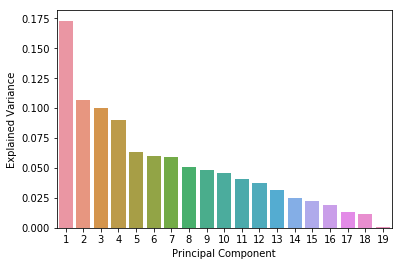

In [178]:
# Plot the Variance Ratio for each component
sns.barplot(x=np.arange(pca.n_components_)+1, y=pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

[ 0.17304502  0.27996226  0.38026178  0.47039667  0.53372021  0.59403792
  0.65316317  0.70408254  0.75268898  0.79854606  0.8390496   0.87656085
  0.9077813   0.93269089  0.9553509   0.97436202  0.98728462  0.99894052
  1.        ]


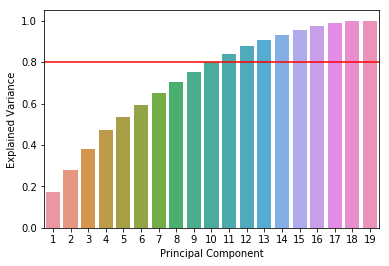

In [179]:
#Calculate the cumulative variance for all the components
cumulativeVariance = np.cumsum(pca.explained_variance_ratio_)
print(cumulativeVariance)

# Plot the Cumulative Variance Ratio
sns.barplot(x=np.arange(pca.n_components_)+1, y=cumulativeVariance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.axhline(y=0.8, color='r', linestyle='-')
plt.show()

### Some Points:
* As we want to capture atleast 80% of variance in our dataset with fewer inputs, we can choose the first  11 principal components.
* We will use these 11 components to do the clustering for our filtered data sets.
* Lets rename the columns and create a new data set with reduced columns.

In [180]:
#for col in data_pca_transformed.columns:
#    data_pca_transformed.rename(columns={col:"PC{}".format(str(col+1))},inplace=True)
    
# Rename Columns
data_pca_transformed.columns = ['PC{}'.format(n+1) for n in np.arange(pca.n_components_)]

#Reduce the number of columns
numberPCA=11
reduced_pca_columns=['PC{}'.format(n+1) for n in np.arange(numberPCA)]
data_reduced_pca_transformed = data_pca_transformed[reduced_pca_columns]

In [181]:
data_reduced_pca_transformed.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-4.718882,-2.960997,1.116481,2.548510,-0.199757,-1.365595,-0.791734,-5.314410,2.321042,-2.127782,2.549628
1,0.491975,1.380983,1.128373,6.301044,-0.359154,0.709515,-1.014473,1.097250,1.166798,0.156752,1.311644
2,-2.770408,-4.774232,1.598379,0.078869,-0.386427,-0.448358,-1.733045,-1.781863,-2.426829,-2.196854,1.731944
3,-3.041096,-3.171436,0.658393,2.253144,0.320050,-0.796833,-2.609572,-2.273643,-1.241404,-5.576016,-1.677364
4,2.375304,1.511895,-0.941456,-0.373477,1.079997,-4.262592,0.463675,7.823742,0.350148,1.699506,-1.973704


### Some Points:

* I am trying the K-Means clustering algorithm. We can choose GMM or any other clustering algorithm too. 
* We have been explicitly asked to generate three custers. 
* We have been asked to capture 80% of variance which consists of 11 principal components as shown above. But I am curious to   see how different number of PCA's can be used for clustering. So, lets try and use 2 to 11 PCA's and see how the clustering score looks like for each one of them.
* As we do not have labelled data, for cluster validation I will be using the internal indices method of sillhoutte coefficient.<br>Silhoutte coefficent's value ranges from [-1,1]. Higher value indicates better cluster formations.

In [182]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Create three clusters as per the requirement
numClusters=3

#lets do a KMeans clustering
for numPCA in (np.arange(2,numberPCA+1)):
    
    reduced_pca_columns=['PC{}'.format(n+1) for n in np.arange(numPCA)]
    data_reduced_pca_transformed = data_pca_transformed[reduced_pca_columns]
    
    #Apply the clustering algorithm
    clusterer = KMeans(n_clusters=numClusters,random_state=20642).fit(data_reduced_pca_transformed)

    #Predict the cluster for each training data row
    preds=clusterer.predict(data_reduced_pca_transformed)
    
    #Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(data_reduced_pca_transformed,clusterer.labels_)

    print("Silhouette Score for",numClusters, "clusters with ",numPCA," number of principal components is :",score)


Silhouette Score for 3 clusters with  2  number of principal components is : 0.369292352361
Silhouette Score for 3 clusters with  3  number of principal components is : 0.265160529462
Silhouette Score for 3 clusters with  4  number of principal components is : 0.208124584973
Silhouette Score for 3 clusters with  5  number of principal components is : 0.179020060036
Silhouette Score for 3 clusters with  6  number of principal components is : 0.159204948934
Silhouette Score for 3 clusters with  7  number of principal components is : 0.142521818047
Silhouette Score for 3 clusters with  8  number of principal components is : 0.132274982966
Silhouette Score for 3 clusters with  9  number of principal components is : 0.122963620974
Silhouette Score for 3 clusters with  10  number of principal components is : 0.115718744004
Silhouette Score for 3 clusters with  11  number of principal components is : 0.109544657511


### Some Points:
* Having more number of PCA's does not necessarily guarantee a better clustering outcome (silhoutte score with 2  PCA's is higher than silhoutte score with 11 PCA's). 
* Depending on the real life use case and further analysis, we can find the right number of PCA's
* Lucklily the highest silhoutte score is when the number of PCA's or dimension is 2. Let's try to plot the 2d graph for it. For more than 2 dimensions, it's difficult to visualize to the graph. So we will be only plotting a single graph for first two dimensions. 

C:\Users\akarwa\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


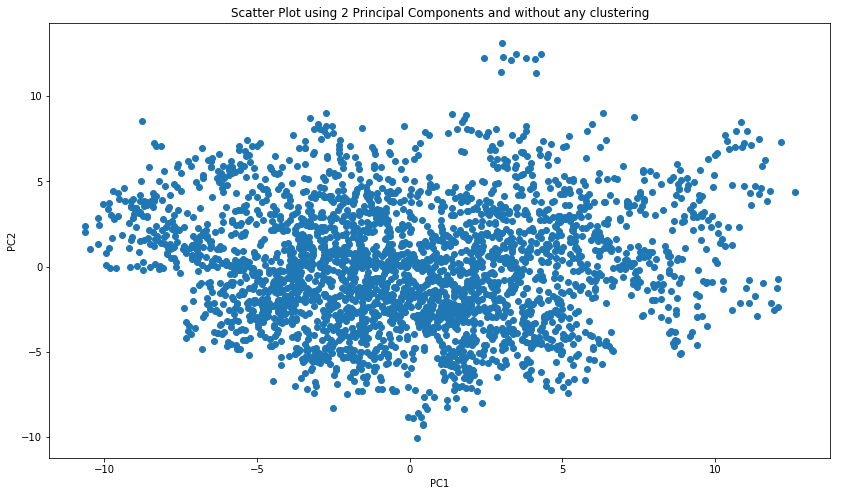

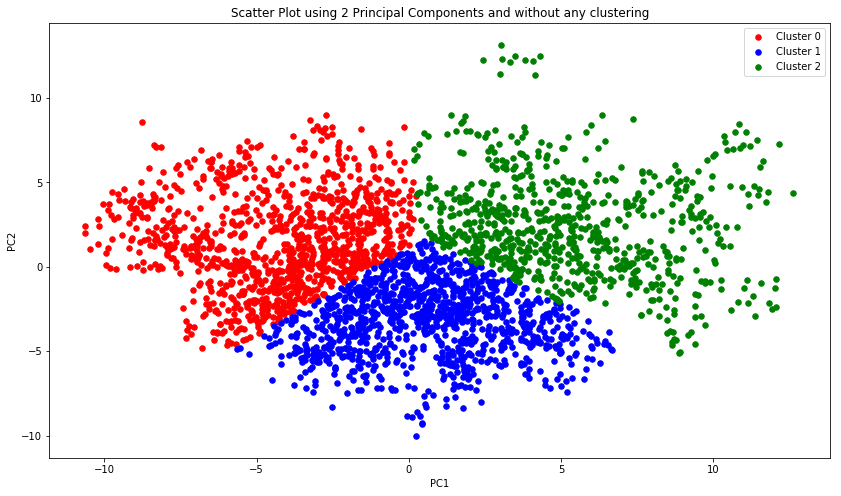

In [183]:
#Let's plot the data points without clustering using first two PCA's
fig, ax = plt.subplots(figsize = (14,8))
my_scatter_plot = ax.scatter(data_reduced_pca_transformed["PC1"],data_reduced_pca_transformed["PC2"])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("Scatter Plot using 2 Principal Components and without any clustering")
plt.plot()


#Lets again build the clustering model using two PCA's
reduced_pca_columns=['PC{}'.format(n+1) for n in np.arange(2)]
data_reduced_pca_transformed = data_pca_transformed[reduced_pca_columns]

#Train the model
clusterer = KMeans(n_clusters=numClusters,random_state=20642).fit(data_reduced_pca_transformed)

#Get the labels and add a column in the data frame
preds=clusterer.predict(data_reduced_pca_transformed)
data_reduced_pca_transformed['Label']=preds



#Let's plot the data points with clustering using first two PCA's
fig, ax = plt.subplots(figsize = (14,8))
clr=['red','blue','green']
for i, cluster in data_reduced_pca_transformed.groupby('Label'):   
    cluster.plot(ax = ax, kind = 'scatter', x = 'PC1', y = 'PC2', color = clr[i], label = 'Cluster %i'%(i), s=30);
ax.set_title("Scatter Plot using 2 Principal Components and without any clustering")
plt.show()


In [184]:
#Let's see the cluster centers
clusterer.cluster_centers_

array([[-4.32344705,  1.5383336 ],
       [ 0.57193897, -3.19169946],
       [ 5.24935111,  2.41411036]])

In [185]:
pca.components_[0]

array([-0.0094185 ,  0.04757984,  0.03367498,  0.02148774, -0.1340823 ,
        0.37996717,  0.23987871,  0.28996645,  0.40548685,  0.34774493,
        0.33546428,  0.0538153 ,  0.30506507,  0.14563311,  0.17233881,
        0.01714152,  0.32863015, -0.00460486,  0.19751103])

### Some Points:
* We can see that the clustering looks quite decent with first two PCA's
* Now, for this example lets build the clustering algorithm using all the 11 PCA's.

In [186]:
#Perform K-Means clustering with three clusters and 11 PCA's
reduced_pca_columns=['PC{}'.format(n+1) for n in np.arange(numberPCA)]
data_reduced_pca_transformed = data_pca_transformed[reduced_pca_columns]
clusterer = KMeans(n_clusters=numClusters,random_state=20642).fit(data_reduced_pca_transformed)

#Let's see the cluster centers
clusterer.cluster_centers_

array([[ 0.05027279, -2.70168609,  2.07545204, -0.47475597, -0.20070302,
         0.38623715, -0.24898169,  0.3375038 , -0.02804892,  0.16640673,
        -0.05812709],
       [ 5.07865985,  1.64281958, -1.27112789,  0.12961781, -0.062148  ,
        -0.01388677,  0.07820183, -0.23774857, -0.09700145, -0.10538711,
         0.0148302 ],
       [-4.30408909,  1.40387773, -1.07084507,  0.37988542,  0.25851383,
        -0.38572172,  0.19066634, -0.14814648,  0.11007536, -0.08295343,
         0.04738204]])

In [187]:
#Create a function that will take the necessary input and return a data frame with the predicted cluster labels.
def predict_clusters(test_input_data,trained_pca,clusteringModel,numPCA):
    
    test_data = test_input_data.copy()
    
    #Do the data preprocessing on the input data
    
    ##Remove the rows which has less score less than 5 for either Cloting Spending or Internet Spending.
    test_data = test_data[(test_data['Clothing Spending'] > 5) & (test_data['Internet Spending'] > 5)]
    
    ##Do gender transformation
    f = lambda x: 0 if x =='male' else 1
    test_data['Gender'] = test_data['Gender'].map(f)
    
    
    ##Drop the behavioral spending pattern features
    test_data_before_transformed = test_data.drop(['Entertainment Spending','Clothing Spending','Internet Spending','Retail Spending'], axis=1)
    
    #Transform the data using the trained PCA
    test_data_transformed = pd.DataFrame(trained_pca.transform(test_data_before_transformed))
    
    # Rename Columns for the transformed data
    test_data_transformed.columns = ['PC{}'.format(n+1) for n in np.arange(trained_pca.n_components_)]
    
    #Only keep the columns that are needed
    reduced_pca_columns=['PC{}'.format(n+1) for n in np.arange(numPCA)]
    test_data_transformed = test_data_transformed[reduced_pca_columns]
    
    #Predict the cluster label using the clustering model
    test_data['Predicted Cluster'] = clusteringModel.predict(test_data_transformed)
    
    #Return the output
    return test_data[['Age','Gender','Clothing Spending','Internet Spending','Predicted Cluster']]

In [188]:
#Read the test/unseen data
test_unseen_data = pd.read_csv("unseen_raw_data.csv")

#Peek at the unseen data
test_unseen_data.head()

,Age,Gender,Music,Movies/Theaters,Tech/Gadgets,Museums,Food/Dining,Camping/Hiking,Concerts,Clubs/Dancing,...,Art,Shopping,Social Media,Reading,Socializing,Gaming,Entertainment Spending,Clothing Spending,Internet Spending,Retail Spending
0,21.0,female,9.5,7.2,0.8,3.5,3.8,9.1,0.8,1.0,...,5.8,4.2,5.7,4.7,7.8,8.8,4.0,7.8,5.7,6.8
1,23.0,female,9.1,8.6,3.3,5.5,3.8,6.5,6.1,2.5,...,5.4,4.2,6.7,3.1,8.0,8.4,4.8,7.0,4.7,5.3
2,19.0,female,8.2,9.5,0.9,4.3,4.1,9.9,2.1,1.4,...,9.5,4.2,0.9,6.3,8.2,9.2,4.0,2.7,3.7,3.7
3,19.0,female,8.8,6.3,0.1,3.9,3.2,9.4,9.5,1.9,...,1.9,5.1,0.0,2.4,8.4,0.9,3.7,2.0,2.8,6.5
4,22.0,female,9.6,9.9,4.5,5.6,1.0,6.8,1.2,1.4,...,2.7,5.1,8.3,4.1,8.4,1.6,9.5,5.7,3.1,7.5


In [189]:
#Perform PCA nd get the predicted label for the unseen data
predict_unseen_data=predict_clusters(test_unseen_data,pca,clusterer,11)

#Print the results
predict_unseen_data

,Age,Gender,Clothing Spending,Internet Spending,Predicted Cluster
0,21.0,1,7.8,5.7,0
11,20.0,0,5.3,6.7,0
17,18.0,1,8.4,5.9,0
21,28.0,1,7.4,7.3,1
26,18.0,0,5.4,5.1,2
28,22.0,1,6.4,6.7,1
29,19.0,0,6.0,8.9,2
33,30.0,0,6.3,6.1,1
47,26.0,0,7.5,7.1,1
48,23.0,1,7.2,6.0,0


### General Note:
* Some of the syntaxes have been looked up online on stackoverflow or other commmon websites as I still learning Python :)